3. 분류 데이터셋 -> AI가 그룹 나누는 방식

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)

# 데이터 생성
N = 100 # 클래스 당 샘플 수

# 클래스 0 : 평균 -2, 0
X0 = rng.normal(loc=[-2, 0], scale=1.0, size=(N, 2))
y0 = np.zeros(N, dtype=int)

# 클래스 1 : 평균 2, 0
X1 = rng.normal(loc=[2, 0], scale=1.0, size=(N, 2))
y1 = np.ones(N, dtype=int)

X = np.vstack([X0, X1]) # 세로 쌓기 : (N, 2) + (N, 2) -> (2N, 2)
y = np.concatenate([y0, y1]) # 이어붙이기 : (N,) + (N,) -> (2N,)

df = pd.DataFrame({"x1": X[:,0], "x2": X[:,1], "label": y})
df.head()

,x1,x2,label
0,-1.874270,-0.132105,0
1,-1.359577,0.104900,0
2,-2.535669,0.361595,0
3,-0.696000,0.947081,0
4,-2.703735,-1.265421,0


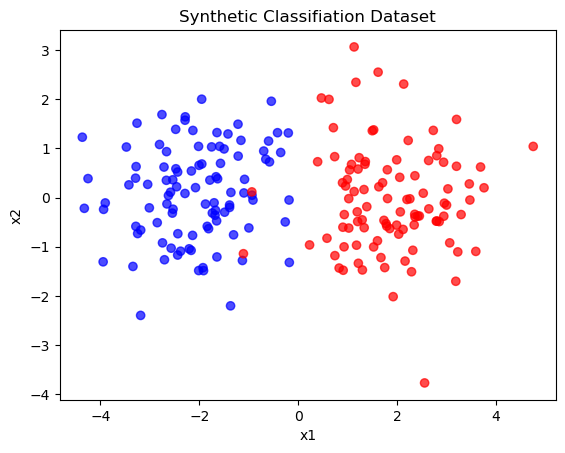

In [ ]:
# 시각화
plt.scatter(df["x1"], df["x2"], c=df["label"], cmap="bwr", alpha=0.7) # c는 색상 선택되는 기준
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Synthetic Classifiation Dataset")
plt.show()

로지스틱 회귀 (Logistic Regression) : 선형회귀 -> Sigmoid -> 확률따라 의사결정 : 분류기

- 선형회귀(Linear Regression) -> 출력 : 실수(연속적) -> 회귀 문제
- 로지스틱 회귀(Logistic Regression) -> 출력 : 0~1(확률) -> 분류 문제

In [ ]:
# 간단 분류 모델 학습 (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# 모델 선언
clf = LogisticRegression()

# 학습
clf.fit(X, y)

# 파라미터
print("계수 W:", clf.coef_) # [w1, w2]
print("절편 b:", clf.intercept_) # [b1,]

계수 W: [[ 2.75028981 -0.30773169]]
절편 b: [0.32718546]


In [ ]:
# 예측
y_pred = clf.predict(X)

# 정확도
acc = (y_pred == y).mean()
print("훈련 정확도:", acc)

훈련 정확도: 0.985


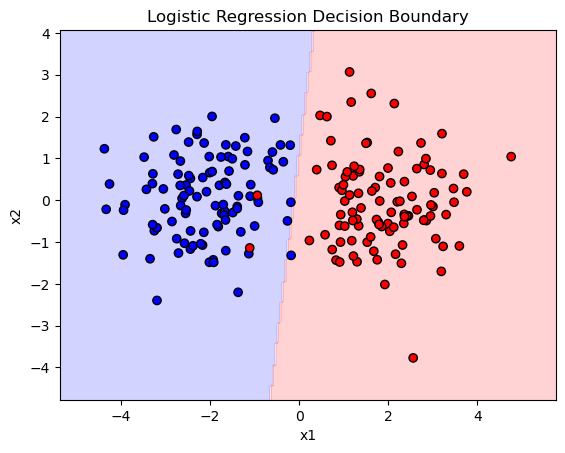

In [ ]:
# 결정경계 시각화

# x1, x2 평면에 (tiny)격자 만들기
xx, yy = np.meshgrid(
  np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
  np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)

# 격자점 예측
grid = np.c_[xx.ravel(), yy.ravel()] # .c_ : .column_stack 단축표기
Z = clf.predict(grid).reshape(xx.shape)

# 등고선으로 경계 시각화
plt.contourf(xx, yy, Z, cmap="bwr", alpha=0.2)

# 원래 데이터
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolor="k")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()